In [21]:
import ibis
from ibis import _
conn = ibis.duckdb.connect()

In [11]:
state_boundaries = "https://data.source.coop/cboettig/us-boundaries/us-state-territory.parquet"
county_boundaries = "https://data.source.coop/cboettig/us-boundaries/us-county.parquet"

states = conn.read_parquet(state_boundaries).rename(State = "STUSPS")
county = conn.read_parquet(county_boundaries).rename(county = "NAMELSAD")

votes = conn.read_csv("measures.csv")


In [55]:
gdf = (votes
       .filter(votes["Jurisdiction Type"] == "County")
       .rename(county = "Jurisdiction Name")
       .join(county, "county")
      )

In [56]:
polygons = gdf.head().execute().set_crs("epsg:4326")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [57]:
import leafmap.maplibregl as leafmap
outcome = {
    'fill-color': [
      'match',
      ['get', 'Pass?'], 
      "True", '#00FF00',
      "False", '#FFA07A', 
      '#ccc'
    ],
}
paint = {"fill-color": "#00FF00", "fill-opacity": 0.5 }
m = leafmap.Map(style="positron")
m.add_gdf(polygons,"fill")
m

Map(height='600px', map_options={'bearing': 0, 'center': (0, 20), 'pitch': 0, 'style': 'https://tiles.openfree…

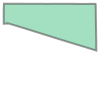

In [58]:
polygons.geometry.iloc[1]